In [1]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (10, 8)

from smreg.utils.ds_utils import resize_pairdata, std_scaler, pair2val_data
from smreg.predict import RegistrationPredictor
from smreg.predict import RegistrationPredictor
from subtle.subtle_preprocess import dcm_to_sitk, register_im
import SimpleITK as sitk
import numpy as np

/home/srivathsa/miniconda3/envs/synmorph/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')


<Figure size 640x480 with 0 Axes>

In [2]:
pre_path = '/home/srivathsa/projects/studies/gad/breast/data/MDACC_0001/401_AX_DYN_3D_ACQ_1'
post_path = '/home/srivathsa/projects/studies/gad/breast/data/MDACC_0001/402_AX_DYN_3D_ACQ_2'

pre_sitk = dcm_to_sitk(pre_path)
post_sitk = dcm_to_sitk(post_path)

pre_npy = sitk.GetArrayFromImage(pre_sitk)
post_npy = sitk.GetArrayFromImage(post_sitk)

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 0.99969999999999 Deviation of:0.00030000000000996

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 1 Deviation of:7.105427357601e-15

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 1 Deviation of:3.5527136788005e-15

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 0.99998 Deviation of:1.9999999999243e-05

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 0.9999994 Deviation of:5.9999999990623e-07

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 0.9999996 Deviation of:4.000000000115e-07

ImageSeriesReader (0x5668c50): Non uniform sampling or missing slices detected , expected 1 got: 1.000001 Deviation of:9.9999999991773e-07

ImageSeriesReader (0x5668c5

In [3]:
pmap = sitk.GetDefaultParameterMap('affine')
post_npy_reg, _ = register_im(pre_npy, post_npy, param_map=pmap, ref_fixed=pre_sitk, ref_moving=post_sitk)

image registration
Installing all components.
InstallingComponents was successful.

ELASTIX version: 5.000
Command line options from ElastixBase:
-fMask    unspecified, so no fixed mask used
-mMask    unspecified, so no moving mask used
-out      ./
-threads  unspecified, so all available threads are used
  The default value "true" is used instead.

  From elastix 4.8 it defaults to true!
This may change the behavior of your registrations considerably.

Command line options from TransformBase:
-t0       unspecified, so no initial transform used

Reading images...
Reading images took 0 ms.

  A default pyramid schedule is used.
  A default pyramid schedule is used.
  The default value "false" is used instead.
  The default value "GeometricalCenter" is used instead.
Transform parameters are initialized as: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
InitializeTransform took 0.00s
Scales are estimated automatically.
Scales for transform parameters are: [8555.045572916666, 8555.045572916666, 5866

56	-0.741706	21.053407	6.536336	0.004787	3.4
57	-0.720418	20.876709	6.563916	0.005541	3.7
58	-0.739017	20.835651	6.570358	0.005123	3.6
59	-0.759508	20.658616	6.598279	0.009012	3.6
60	-0.728829	21.658616	6.443603	0.004481	3.5
61	-0.738842	22.658122	6.296084	0.004986	3.5
62	-0.748636	23.650489	6.156152	0.007018	3.6
63	-0.769351	24.619948	6.025329	0.005250	3.5
64	-0.725290	24.442815	6.048815	0.004429	3.5
65	-0.738341	25.049924	5.969069	0.005533	3.5
66	-0.739687	26.049496	5.842256	0.005117	3.7
67	-0.725986	27.036649	5.722197	0.007558	3.6
68	-0.743597	27.994788	5.610294	0.004244	3.5
69	-0.737442	28.342891	5.570715	0.004394	3.5
70	-0.749354	28.789134	5.520787	0.005058	3.5
71	-0.709552	28.682940	5.532587	0.005117	3.5
72	-0.730810	28.509341	5.551986	0.005845	3.5
73	-0.733535	28.379358	5.566601	0.005721	3.5
74	-0.749689	28.213335	5.585380	0.006202	3.4
75	-0.736463	28.540338	5.548513	0.006284	3.6
76	-0.741733	28.414908	5.562596	0.007138	3.7
77	-0.749203	29.413722	5.452388	0.007620	3.6
78	-0.7378

283	-0.734728	102.040485	2.234022	0.004724	3.5
284	-0.748337	102.940422	2.217801	0.007808	3.5
285	-0.745061	103.927482	2.200278	0.005983	3.4
286	-0.732327	103.750348	2.203402	0.008086	3.4
287	-0.744243	103.832340	2.201955	0.007272	3.5
288	-0.717773	104.832340	2.184456	0.005248	3.5
289	-0.747667	104.655496	2.187530	0.004577	3.5
290	-0.755164	104.590921	2.188655	0.007802	3.6
291	-0.739601	105.590768	2.171368	0.005648	3.4
292	-0.757068	105.435484	2.174035	0.006333	3.5
293	-0.724460	105.300719	2.176355	0.005772	3.4
294	-0.744368	106.299611	2.159278	0.006625	3.4
295	-0.752437	107.299604	2.142448	0.006154	3.5
296	-0.722659	108.299604	2.125878	0.003918	3.5
297	-0.740267	108.210044	2.127352	0.006358	3.6
298	-0.755255	108.073744	2.129598	0.008008	3.6
299	-0.754566	109.073744	2.113226	0.005895	3.5
300	-0.754417	108.896610	2.116107	0.009496	3.5
301	-0.755409	109.896610	2.099941	0.006604	3.5
302	-0.736200	109.719546	2.102786	0.008816	3.4
303	-0.727319	110.719546	2.086822	0.009147	3.5
304	-0.741646

  The default value "0" is used instead.
  The default value "192" is used instead.
  The default value "10" is used instead.
  The default value "true" is used instead.
  The default value "false" is used instead.
  The default value "1" is used instead.
  The default value "0.625" is used instead.
  The default value "0" is used instead.
  The default value "1000" is used instead.
  The default value "0.1" is used instead.
Elastix initialization of all components (for this resolution) took: 0 ms.
  Computing the fixed image extrema took 11 ms.
  Computing the moving image extrema took 8 ms.
Initialization of AdvancedMattesMutualInformation metric took: 19 ms.
Starting automatic parameter estimation for AdaptiveStochasticGradientDescent ...
  The default value "Original" is used instead.
  Computing JacobianTerms ...
  Computing the Jacobian terms took 0.001152s
  NumberOfGradientMeasurements to estimate sigma_i: 3
  Sampling gradients ...
  Sampling the gradients took 0.013236s
Autom

178	-0.685656	54.672654	3.401678	0.009007	3.4
179	-0.689931	55.186321	3.378743	0.008057	3.4
180	-0.694686	54.835996	3.394351	0.007201	3.2
181	-0.678355	54.484142	3.410173	0.013581	3.4
182	-0.669220	55.484142	3.365587	0.014064	3.4
183	-0.674782	55.131431	3.381179	0.008699	3.5
184	-0.677089	56.128699	3.337461	0.006732	3.4
185	-0.688777	57.118454	3.295175	0.009798	3.4
186	-0.666788	56.765738	3.310121	0.007946	3.3
187	-0.678348	57.765738	3.268096	0.010972	3.4
188	-0.682461	58.760869	3.227322	0.008889	3.4
189	-0.700394	59.760868	3.187360	0.011577	3.5
190	-0.682246	60.760753	3.148381	0.007939	3.3
191	-0.684067	60.411152	3.161901	0.007081	3.3
192	-0.675207	61.386373	3.124473	0.008944	3.4
193	-0.669343	61.250379	3.129639	0.011264	3.4
194	-0.698256	62.250375	3.092046	0.007927	3.4
195	-0.675019	63.240276	3.055712	0.009632	3.3
196	-0.658417	62.892935	3.068363	0.006705	3.4
197	-0.678101	63.480846	3.047010	0.010023	3.3
198	-0.670750	64.454393	3.012297	0.008698	3.5
199	-0.679285	64.101710	3.024781	0

358	-0.684922	124.887806	1.764466	0.006846	3.3
359	-0.667845	124.802062	1.765503	0.005277	3.2
360	-0.704287	124.454322	1.769724	0.008192	3.0
361	-0.676275	124.381986	1.770605	0.010298	3.3
362	-0.678401	124.029271	1.774911	0.010780	3.3
363	-0.674489	125.029271	1.762756	0.007928	3.2
364	-0.686898	125.944417	1.751778	0.010203	3.2
365	-0.704715	126.879761	1.740698	0.011047	3.4
366	-0.688783	127.495255	1.733483	0.008473	3.2
367	-0.657994	127.145421	1.737577	0.007999	3.4
368	-0.668609	127.100201	1.738107	0.013195	3.3
369	-0.697511	126.747486	1.742256	0.010514	3.5
370	-0.667358	127.747486	1.730544	0.008246	3.2
371	-0.661536	128.747448	1.718988	0.011189	3.3
372	-0.715089	128.394731	1.723046	0.010389	3.2
373	-0.665867	129.394632	1.711590	0.010428	3.3
374	-0.699028	129.042456	1.715608	0.011366	3.3
375	-0.714374	128.689740	1.719650	0.009105	3.3
376	-0.685381	128.337024	1.723712	0.008013	3.4
377	-0.684537	127.995201	1.727666	0.009921	3.2
378	-0.666778	128.995170	1.716149	0.007664	3.3
379	-0.691691

74	-0.625386	32.086108	3.146187	0.012170	3.6
75	-0.632326	31.608721	3.174737	0.009164	3.6
76	-0.628976	32.456944	3.124362	0.013941	3.6
77	-0.624112	33.345375	3.073285	0.018451	3.7
78	-0.611053	34.345373	3.017756	0.009499	3.5
79	-0.627011	34.652993	3.001076	0.016605	3.5
80	-0.635794	34.235779	3.023744	0.010318	3.6
81	-0.646103	33.705114	3.053075	0.017535	3.4
82	-0.644041	33.174427	3.082983	0.012552	3.5
83	-0.645379	34.174363	3.027110	0.012514	3.5
84	-0.634845	33.643673	3.056508	0.014883	3.6
85	-0.646439	34.643007	3.001614	0.015202	3.5
86	-0.670065	35.612008	2.950237	0.013041	3.5
87	-0.631103	36.611621	2.899048	0.019343	3.6
88	-0.610789	37.307549	2.864446	0.022530	3.4
89	-0.628475	38.307549	2.816148	0.013903	3.6
90	-0.639336	37.776888	2.841573	0.009483	3.6
91	-0.606756	37.251815	2.867187	0.019369	3.5
92	-0.631220	36.721714	2.893518	0.013748	3.5
93	-0.643615	36.191069	2.920366	0.019366	3.4
94	-0.620498	37.190968	2.870185	0.011177	3.5
95	-0.622393	36.675064	2.895859	0.018658	3.5
96	-0.6409

308	-0.650181	98.949354	1.392411	0.012419	3.4
309	-0.646718	98.525930	1.397344	0.014112	3.6
310	-0.636415	97.995241	1.403576	0.022456	3.5
311	-0.641377	98.995240	1.391879	0.014284	3.5
312	-0.609264	98.467467	1.398028	0.011988	3.5
313	-0.663937	99.463772	1.386465	0.020434	3.5
314	-0.651912	98.933082	1.392600	0.019485	3.5
315	-0.614367	99.933082	1.381085	0.020063	3.4
316	-0.622416	100.902720	1.370099	0.019742	3.5
317	-0.651877	101.902698	1.358952	0.014994	3.5
318	-0.632644	102.902653	1.347984	0.018872	3.5
319	-0.639611	103.902653	1.337192	0.014310	3.4
320	-0.627777	104.844286	1.327187	0.013620	3.5
321	-0.639120	105.009345	1.325448	0.015362	3.4
322	-0.636965	104.478737	1.331053	0.013964	3.4
323	-0.630389	105.478687	1.320530	0.007885	3.4
324	-0.635963	104.990946	1.325642	0.009703	3.5
325	-0.621679	105.565621	1.319622	0.011116	3.4
326	-0.632124	106.527527	1.309669	0.021221	3.5
327	-0.623344	107.527527	1.299479	0.016255	3.5
328	-0.657872	108.527527	1.289447	0.017143	3.5
329	-0.624861	108.023

18	-0.541097	4.367738	4.164265	0.021199	2.4
19	-0.556227	4.364022	4.164876	0.016784	2.2
20	-0.514704	5.363916	4.006916	0.024320	2.2
21	-0.517867	6.296623	3.870003	0.032852	2.3
22	-0.514613	7.296623	3.733237	0.018541	2.3
23	-0.540793	6.847683	3.793421	0.033799	2.3
24	-0.531890	6.297270	3.869911	0.017038	2.3
25	-0.533299	7.269511	3.736817	0.017984	2.4
26	-0.550485	8.189867	3.618995	0.010455	2.3
27	-0.535352	8.860362	3.537733	0.025022	2.3
28	-0.520161	9.527328	3.460440	0.019217	3.2
29	-0.556851	10.527313	3.350682	0.018270	3.5
30	-0.509084	9.960608	3.412013	0.020877	3.3
31	-0.548644	10.960595	3.305258	0.020406	3.3
32	-0.555296	11.657545	3.234720	0.017798	3.2
33	-0.532153	12.657449	3.138622	0.023352	3.3
34	-0.514356	13.649755	3.048737	0.016354	3.3
35	-0.543377	14.648998	2.963281	0.035989	3.2
36	-0.541357	15.627686	2.884102	0.019434	3.5
37	-0.527517	15.015781	2.933103	0.016481	3.5
38	-0.544203	15.972576	2.857199	0.032386	3.6
39	-0.533972	15.360466	2.905298	0.016712	3.5
40	-0.554552	14.753244

200	-0.537698	39.358911	1.750164	0.020193	3.4
201	-0.516812	40.336608	1.722267	0.019874	3.2
202	-0.523393	40.476819	1.718339	0.021360	3.2
203	-0.542740	39.864711	1.735620	0.020269	3.3
204	-0.523887	40.864695	1.707565	0.014177	3.2
205	-0.549128	41.861135	1.680498	0.019438	3.3
206	-0.525837	41.248978	1.697024	0.021670	3.3
207	-0.537995	40.641172	1.713757	0.016490	3.3
208	-0.530650	41.640533	1.686416	0.018998	3.3
209	-0.538573	42.573237	1.661674	0.021842	3.4
210	-0.547575	43.508116	1.637592	0.022756	3.4
211	-0.531212	44.508013	1.612597	0.019721	3.3
212	-0.528930	43.923410	1.627117	0.020228	3.2
213	-0.529687	44.923409	1.602435	0.029881	3.4
214	-0.521979	45.923409	1.578491	0.022916	3.5
215	-0.544254	46.923408	1.555252	0.020261	3.4
216	-0.524298	47.798120	1.535478	0.020166	3.4
217	-0.550586	47.428925	1.543762	0.021327	3.5
218	-0.518557	48.428925	1.521527	0.014272	3.3
219	-0.532793	49.160388	1.505664	0.026603	3.3
220	-0.525694	49.085350	1.507276	0.014517	3.3
221	-0.539278	49.450342	1.499467	0

380	-0.534002	78.062543	1.066377	0.015210	2.9
381	-0.544542	77.687631	1.070428	0.017429	3.1
382	-0.538664	78.290444	1.063929	0.018325	3.0
383	-0.520058	77.689021	1.070413	0.019079	2.9
384	-0.537026	78.681250	1.059758	0.023509	2.9
385	-0.560186	78.069090	1.066306	0.017110	2.8
386	-0.528248	77.457205	1.072933	0.023367	2.8
387	-0.529196	78.443201	1.062295	0.018691	2.9
388	-0.519366	77.933214	1.067771	0.016874	2.8
389	-0.540826	78.678338	1.059789	0.025324	3.0
390	-0.519494	78.126437	1.065689	0.025864	2.9
391	-0.527259	79.126436	1.055046	0.028267	2.9
392	-0.533777	80.126436	1.044613	0.019987	2.7
393	-0.518739	79.514290	1.050975	0.015340	2.8
394	-0.517411	80.474363	1.041031	0.025294	2.9
395	-0.532636	79.873306	1.047234	0.013821	2.8
396	-0.537509	80.872145	1.036966	0.019963	2.8
397	-0.531730	80.261502	1.043220	0.015691	2.8
398	-0.523909	79.650331	1.049554	0.021390	2.8
399	-0.531833	80.497682	1.040792	0.015237	2.7
Time spent in resolution 3 (ITK initialization and iterating): 1.551 s.
Stopping

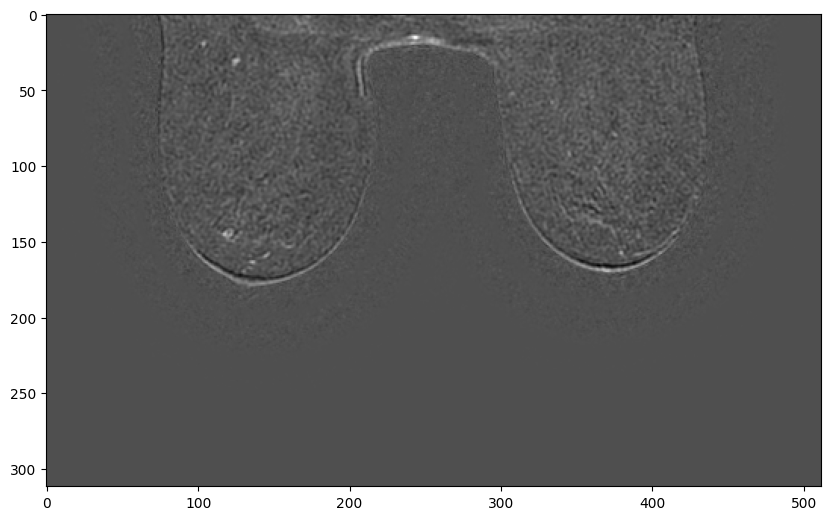

In [4]:
plt.imshow(np.hstack([post_npy[124, 200:] - pre_npy[124, 200:]]))

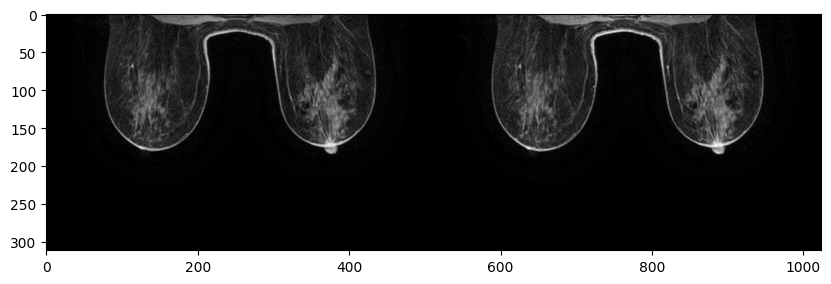

In [21]:
# diff = np.abs(post_npy_reg - pre_npy)
plt.imshow(np.hstack([pre_npy[103, 200:], post_npy_reg[103, 200:]]))

In [6]:
fixed = pre_npy[120:144]
moving = post_npy_reg[120:144]

In [7]:
orig_data = {"img1": moving, "img2": fixed}
from functools import partial

postprocessings = [
    partial(resize_pairdata, target_size=(256, 256)),  std_scaler,  partial(pair2val_data, device="cuda:1")
]

In [8]:
data = {"img1": moving[np.newaxis, ...], "img2": fixed[np.newaxis, ...]}
for func in postprocessings:
    data = func(data)
print(data[0].shape)

torch.Size([24, 256, 256, 2])


In [9]:
from smreg.predict import RegistrationPredictor
model_pth='/home/srivathsa/projects/synthmorph_registration/saved_models/220912-multi_contrast-cycle.ckpt'
reg_predictor = RegistrationPredictor(
    model_path=model_pth, mode="bicubic", device="cuda:1"
)

In [10]:
orig_data, pred_data = reg_predictor.predict(orig_data, pred_data=data[0], mode="bicubic")

(-0.5, 1023.5, 211.5, -0.5)

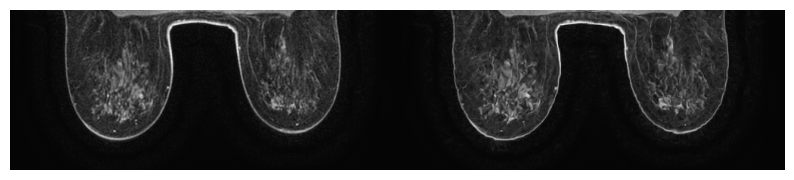

In [14]:
pred = orig_data['pred'].detach().numpy()[:, 0]
diff = (pred[12] - fixed[12]) * 10
plt.imshow(np.hstack([moving[12, 200:-100], pred[12, 200:-100]]))
plt.axis('off')

In [ ]:
plt.imshow(moving[12])